# 장단기 메모리: Long Short-Term Memory, LSTM

## 1. 바닐라 RNN의 한계
- 바닐라 RNN은 비교적 짧은 시퀀스에 대해서만 효과를 보이는 단점이 있습니다.
- 즉, 바닐라 RNN의 시점(time step)이 길어질수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상이 발생합니다.

    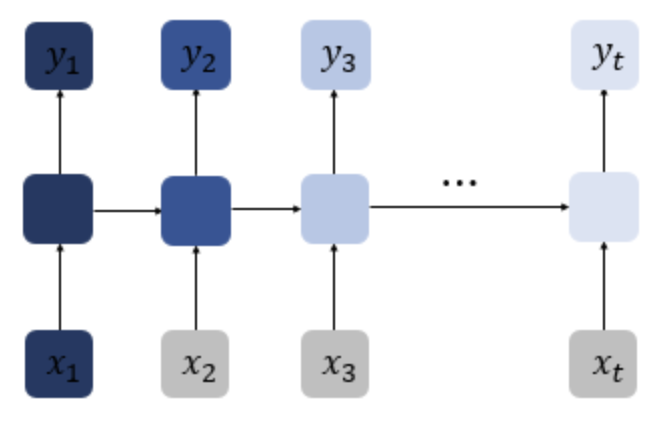
- 위 그림처럼 x1의 정보량이 시점이 지날수록 점점 옅어져가는 것으로 정보량이 손실되는 과정을 표현하였습니다.
- 어쩌면 가장 중요한 정보가 시점의 앞쪽에 위치할 수도 있습니다.
    - 예시: ''모스크바에 여행을 왔는데 건물도 예쁘고 먹을 것도 맛있었어. 그런데 글쎄 직장 상사한테 전화가 왔어. 어디냐고 묻더라구 그래서 나는 말했지. 저 여행왔는데요. 여기 ___'', 장소 정보에 해당하는 단어인 '모스크바'는 앞에 위치하고 있고 RNN이 충분한 기억력을 가지고 있지 않다면 다음 단어를 엉뚱하게 예측합니다.
- 위의 문제를 **장기 의존성 문제(the problem of Long-Term Dependencies)**라고 합니다.

## 2. 바닐라 RNN 내부 열어보기

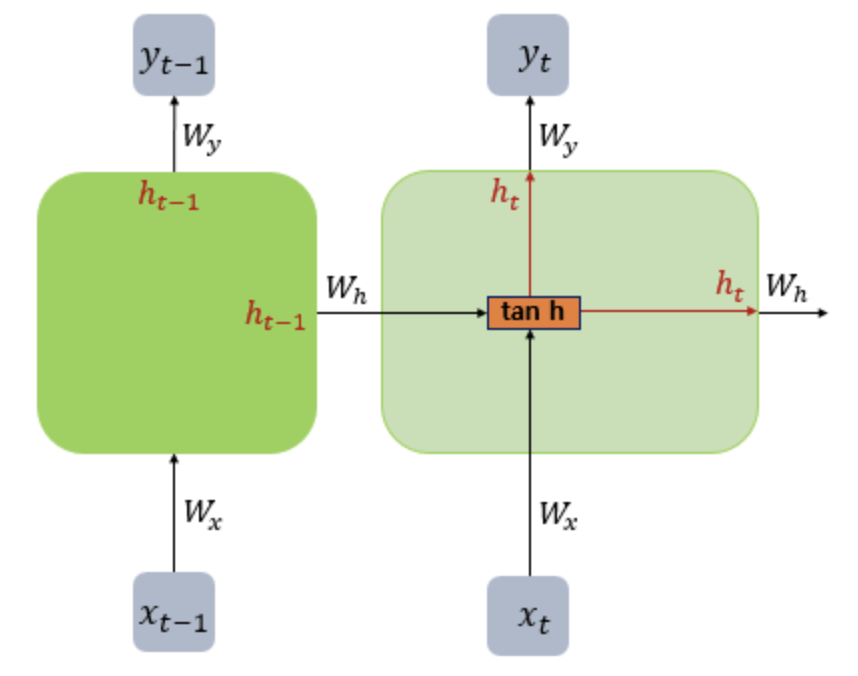
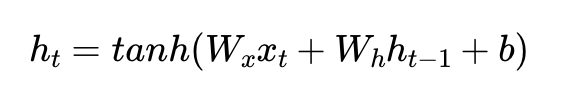
- 여기선 편향 b를 생략합니다. 만약 그린다면 xt옆에 tanh로 향하는 또 하나의 입력선을 그리면 됩니다.

## 3. LSTM: Long Short-Term Memory
- LSTM의 전체적인 내부의 모습:

    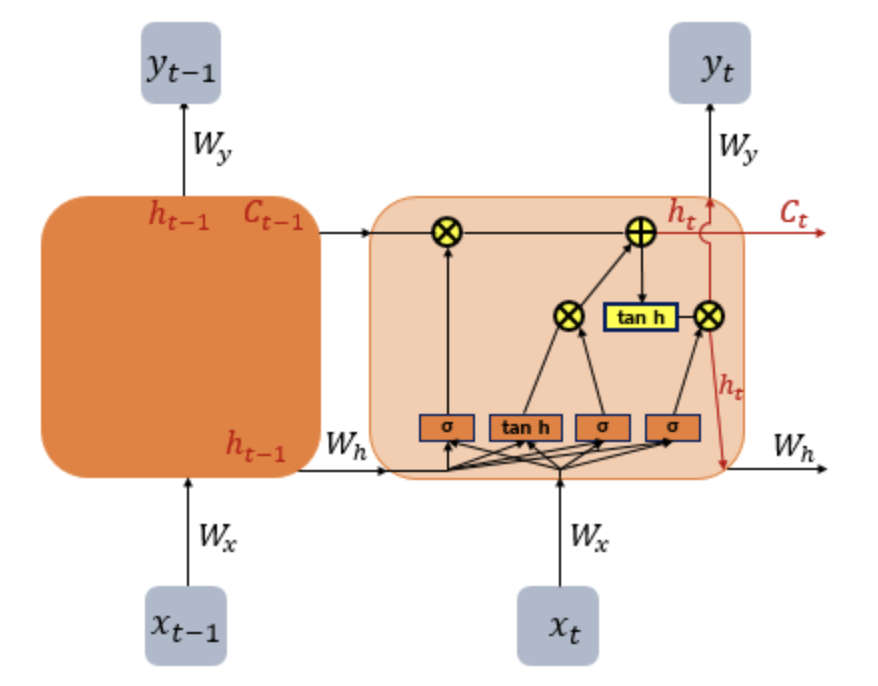
- LSTM은 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정합니다.
- 요약하면 LSTM은 은닉 상태를 계산하는 식이 조금 더 복잡해졌고 셀 상태(cell state) 값이 추가되었습니다.

    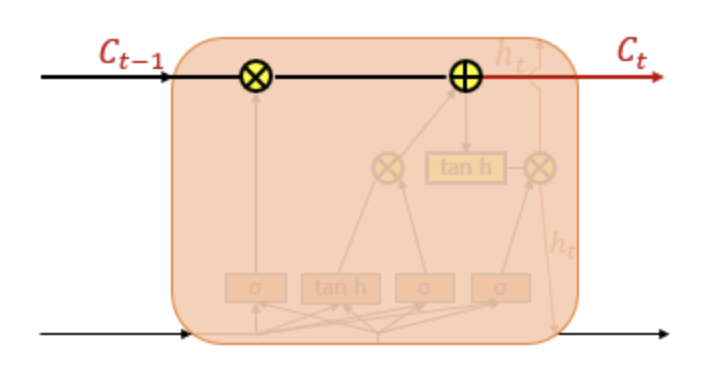
- 은닉 상태의 값과 셀 상태의 값을 구하기 위해서 3개의 추가 게이트를 사용합니다.
### 1. 입력 게이트
- 입력 게이트는 현재 정보를 기억하기 위한 게이트입니다.

    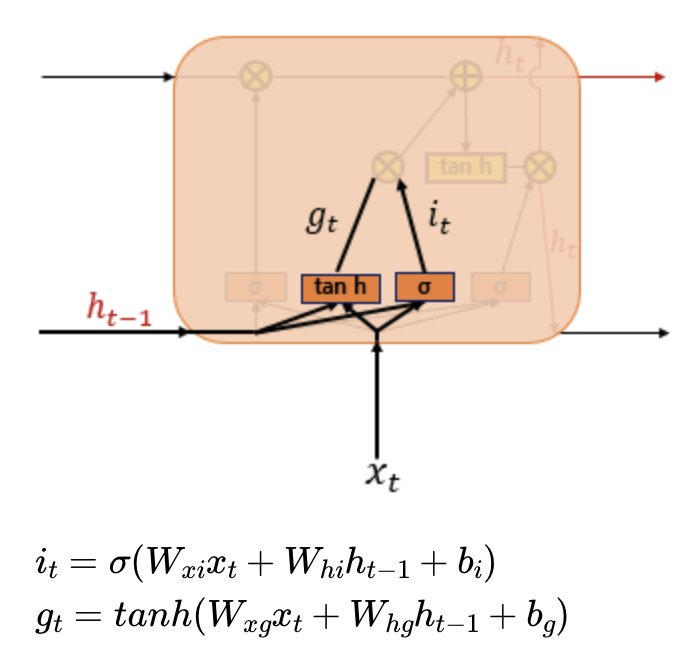
- 위 두 개의 it, gt를 가지고 이번에 선택된 기억할 정보의 양을 정합니다.
### 2. 삭제 게이트
- 삭제 게이트는 기억을 삭제하기 위한 게이트입니다.

    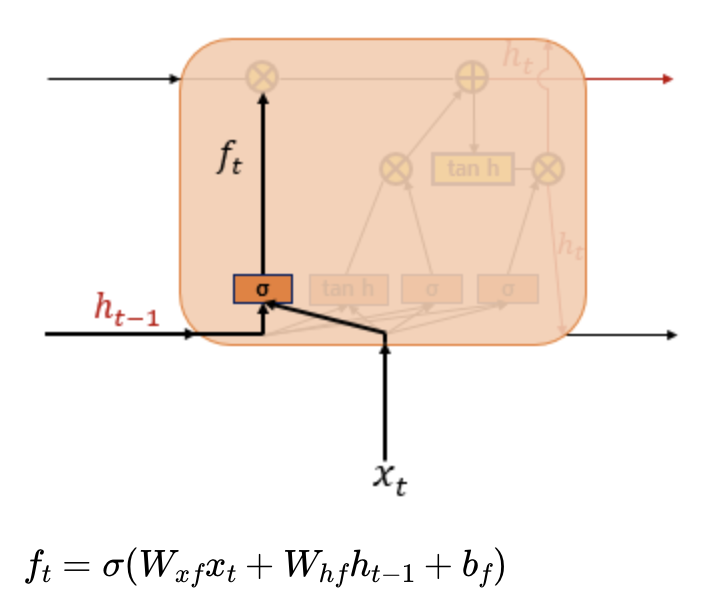
- ft는 삭제 과정을 거친 정보의 양입니다.
- 0에 가까울수록 정보가 많이 삭제된 것이고 1에 가까울수록 정보를 온전히 기억한 것입니다.
### 3. 셀 상태
- 삭제 게이트에서 일부 기억을 잃은 상태입니다. it와 gt는 같은 위치의 성분끼리 곱해지고 이것이 이번에 선택된 기억할 값입니다.

    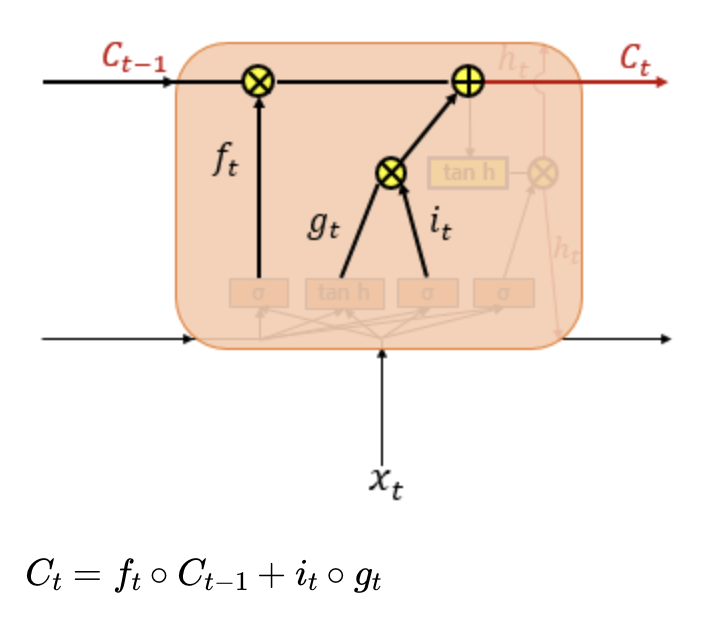
- 입력 게이트에서 선택된 기억을 삭제 게이트의 결과값과 더합니다. 이 값을 현재 시점 t의 셀 상태라고 하며, 이 값은 다음 t+1 시점의 LSTM 셀로 넘겨집니다.
- 결과적으로 삭제 게이트는 이전 시점의 입력을 얼마나 반영할지를 의미하고, 입력 게이트는 현재 시점의 입력을 얼마나 반영할지를 결정합니다.
### 4. 출력 게이트와 은닉 상태
- 출력 게이트는 현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지난 값입니다.

    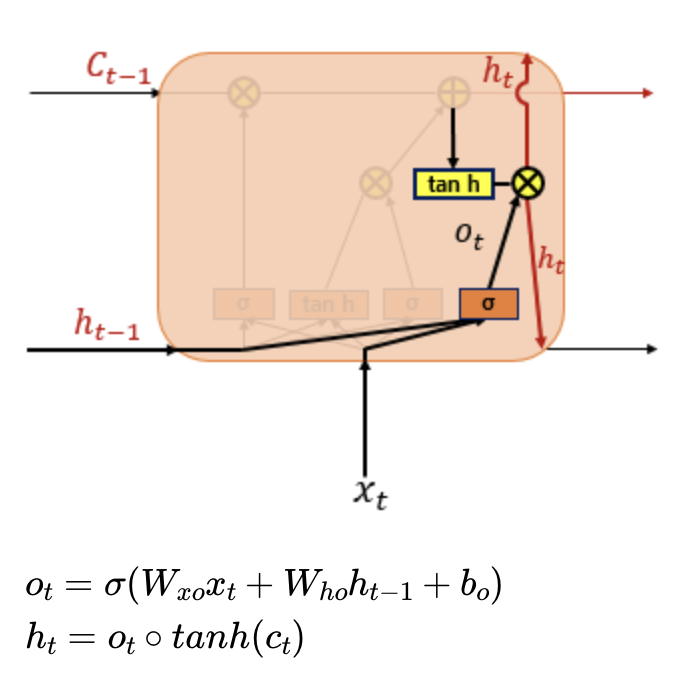
- 이 값은 현재 시점 t의 은닉 상태를 결정하는 일에 쓰입니다. 즉, 값이 걸러지는 효과가 발생하여 은닉 상태가 됩니다.